In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
_data = pd.read_csv("train.csv")


In [3]:
subm = pd.read_csv("sample_submission.csv")

<AxesSubplot:xlabel='Gender', ylabel='count'>

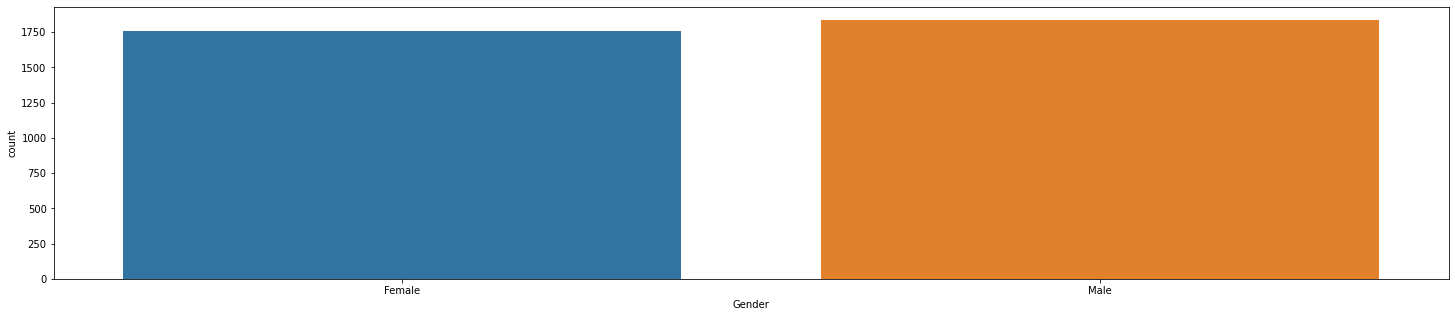

In [4]:
_, axes = plt.subplots(figsize=(25, 5))
sns.countplot(x='Gender', data=_data)

<AxesSubplot:xlabel='Senior', ylabel='count'>

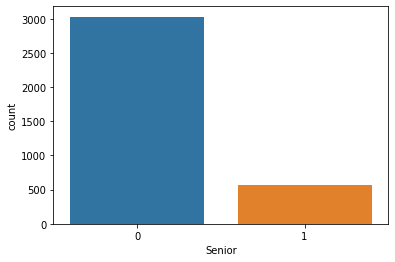

In [5]:
sns.countplot(x='Senior', data=_data)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

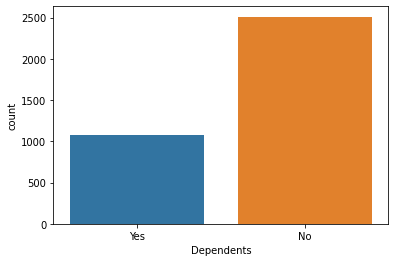

In [6]:
sns.countplot(x='Dependents', data=_data)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

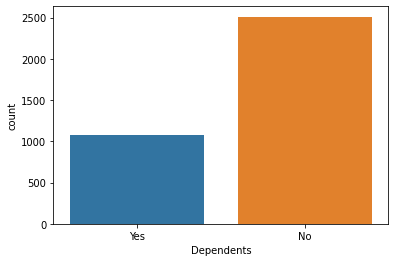

In [7]:
sns.countplot(x='Dependents', data=_data)

<AxesSubplot:xlabel='Churn', ylabel='count'>

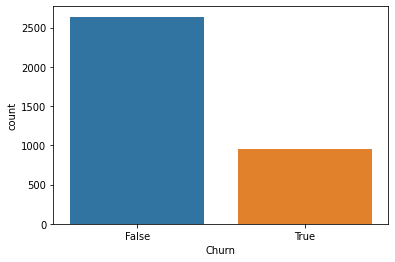

In [8]:
sns.countplot(x='Churn', data=_data)

In [9]:
_data.describe()

,Index,Senior,Tenure,MonthlyCharges
count,3591.000000,3591.000000,3591.000000,3591.000000
mean,1795.000000,0.156502,31.971039,64.487650
std,1036.776736,0.363382,24.579624,30.057029
min,0.000000,0.000000,0.000000,18.400000
25%,897.500000,0.000000,8.000000,35.400000
50%,1795.000000,0.000000,28.000000,70.300000
75%,2692.500000,0.000000,55.000000,89.450000
max,3590.000000,1.000000,72.000000,118.750000


In [10]:
_data.info

<bound method DataFrame.info of       Index  Gender  Senior Married Dependents  Tenure Phone  \
0         0  Female       0     Yes        Yes      67    No   
1         1  Female       0      No         No      34   Yes   
2         2  Female       1     Yes         No      72   Yes   
3         3  Female       0     Yes        Yes      63   Yes   
4         4    Male       0     Yes        Yes      69   Yes   
...     ...     ...     ...     ...        ...     ...   ...   
3586   3586  Female       0      No         No       5   Yes   
3587   3587  Female       0     Yes        Yes      71   Yes   
3588   3588  Female       0     Yes         No      68   Yes   
3589   3589  Female       0     Yes        Yes      12   Yes   
3590   3590    Male       1      No         No       8   Yes   

        MultiplePhones     Internet Security  ... Insurance Support   TV  \
0     No phone service          DSL      Yes  ...       Yes     Yes  Yes   
1                  Yes          DSL      Yes  .

In [11]:
_data.isnull().any()

Index             False
Gender            False
Senior            False
Married           False
Dependents        False
Tenure            False
Phone             False
MultiplePhones    False
Internet          False
Security          False
Backup            False
Insurance         False
Support           False
TV                False
Movies            False
Contract          False
EBilling          False
PaymentMethod     False
MonthlyCharges    False
TotalCharges      False
Churn             False
dtype: bool

In [12]:
_data[_data['TotalCharges'].str.contains('[^0-9.]+')==True]

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1302,1302,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,False
1436,1436,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,False
1486,1486,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,False
2578,2578,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,False
3037,3037,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,False
3247,3247,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,False


In [13]:
_data['TotalCharges'] = _data['TotalCharges'].replace([' '],'0')


In [14]:
_data[_data['TotalCharges'].str.contains('\s')==True]

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
_data['TotalCharges'] = _data['TotalCharges'].astype(float, errors = 'raise')

In [16]:
_data.describe()

,Index,Senior,Tenure,MonthlyCharges,TotalCharges
count,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000
mean,1795.000000,0.156502,31.971039,64.487650,2246.079978
std,1036.776736,0.363382,24.579624,30.057029,2254.591972
min,0.000000,0.000000,0.000000,18.400000,0.000000
25%,897.500000,0.000000,8.000000,35.400000,376.175000
50%,1795.000000,0.000000,28.000000,70.300000,1382.900000
75%,2692.500000,0.000000,55.000000,89.450000,3756.425000
max,3590.000000,1.000000,72.000000,118.750000,8684.800000


In [17]:
df = pd.read_csv("test.csv")
df

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Male,0,No,No,58,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,No,Bank transfer (automatic),99.15,5720.95
1,1,Female,0,Yes,Yes,26,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.80,2361.8
2,2,Female,0,No,No,26,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic),87.15,2274.1
3,3,Male,0,No,No,12,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,67.25,832.3
4,4,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.05,75.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,2390,Male,0,No,No,62,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),43.70,2618.3
2391,2391,Female,0,Yes,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.10,43.15
2392,2392,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,1849.95
2393,2393,Male,1,Yes,No,53,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.90,5549.4


In [18]:
df.describe()

,Index,Senior,Tenure,MonthlyCharges
count,2395.00000,2395.000000,2395.000000,2395.000000
mean,1197.00000,0.168685,33.215031,65.273862
std,691.52127,0.374551,24.407381,30.201111
min,0.00000,0.000000,0.000000,18.250000
25%,598.50000,0.000000,10.000000,38.500000
50%,1197.00000,0.000000,30.000000,70.650000
75%,1795.50000,0.000000,56.000000,90.450000
max,2394.00000,1.000000,72.000000,118.600000


In [19]:
df[df['TotalCharges'].str.contains('[^0-9.]+')==True]

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
38,38,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1060,1060,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2024,2024,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
2039,2039,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,


In [20]:
df['TotalCharges'] = df['TotalCharges'].replace([' '],'0')

In [21]:
df['TotalCharges'] = df['TotalCharges'].astype(float, errors = 'raise')

In [22]:
frames = [_data, df]
res = pd.concat(frames, keys=["train", "test"])
res

Index  Gender  Senior Married Dependents  Tenure Phone  \
train 0         0  Female       0     Yes        Yes      67    No   
      1         1  Female       0      No         No      34   Yes   
      2         2  Female       1     Yes         No      72   Yes   
      3         3  Female       0     Yes        Yes      63   Yes   
      4         4    Male       0     Yes        Yes      69   Yes   
...           ...     ...     ...     ...        ...     ...   ...   
test  2390   2390    Male       0      No         No      62    No   
      2391   2391  Female       0     Yes         No       2   Yes   
      2392   2392  Female       0     Yes        Yes      23   Yes   
      2393   2393    Male       1     Yes         No      53   Yes   
      2394   2394  Female       0      No         No      30   Yes   

              MultiplePhones     Internet             Security  ...  \
train 0     No phone service          DSL                  Yes  ...   
      1                  Yes          DSL                  Yes  ...   
      2                  Yes  Fiber optic                  Yes  ...   
      3                   No          DSL                  Yes  ...   
      4                  Yes  Fiber optic                   No  ...   
...                      ...          ...                  ...  ...   
test  2390  No phone service          DSL                  Yes  ...   
      2391                No           No  No internet service  ...   
      2392               Yes  Fiber optic                   No  ...   
      2393               Yes  Fiber optic                   No  ...   
      2394               Yes  Fiber optic                  Yes  ...   

                      Insurance              Support                   TV  \
train 0                     Yes                  Yes                  Yes   
      1                      No                  Yes                   No   
      2                     Yes                  Yes                   No   
      3                     Yes                  Yes                   No   
      4                     Yes                   No                  Yes   
...                         ...                  ...                  ...   
test  2390                  Yes                  Yes                   No   
      2391  No internet service  No internet service  No internet service   
      2392                   No                   No                  Yes   
      2393                   No                   No                  Yes   
      2394                   No                  Yes                  Yes   

                         Movies        Contract EBilling  \
train 0                      No        Two year       No   
      1                      No        One year      Yes   
      2                      No        Two year      Yes   
      3                      No        Two year       No   
      4                      No        One year       No   
...                         ...             ...      ...   
test  2390                   No        Two year      Yes   
      2391  No internet service  Month-to-month       No   
      2392                   No  Month-to-month      Yes   
      2393                  Yes  Month-to-month      Yes   
      2394                  Yes  Month-to-month       No   

                        PaymentMethod MonthlyCharges  TotalCharges  Churn  
train 0       Credit card (automatic)          54.20       3623.95  False  
      1                  Mailed check          64.40       2088.75   True  
      2     Bank transfer (automatic)          96.60       6827.50  False  
      3                  Mailed check          63.55       4014.20  False  
      4       Credit card (automatic)          95.75       6511.25  False  
...                               ...            ...           ...    ...  
test  2390  Bank transfer (automatic)          43.70       2618.30    NaN  
      2391  Bank transfer (automatic)          20.10         43.

In [23]:
res.isnull().any()


Index             False
Gender            False
Senior            False
Married           False
Dependents        False
Tenure            False
Phone             False
MultiplePhones    False
Internet          False
Security          False
Backup            False
Insurance         False
Support           False
TV                False
Movies            False
Contract          False
EBilling          False
PaymentMethod     False
MonthlyCharges    False
TotalCharges      False
Churn              True
dtype: bool

In [24]:
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [25]:
res['Gender'] =ohe.fit_transform(res[['Gender']])

In [26]:
res['Married'] =ohe.fit_transform(res[['Married']])

In [27]:
res['Dependents'] =ohe.fit_transform(res[['Dependents']])

In [28]:
res['Phone'] =ohe.fit_transform(res[['Phone']])

In [29]:
res['MultiplePhones'] =ohe.fit_transform(res[['MultiplePhones']])

In [30]:
res['Internet'] =ohe.fit_transform(res[['Internet']])

In [31]:
res['Security'] =ohe.fit_transform(res[['Security']])

In [32]:
res['Backup'] =ohe.fit_transform(res[['Backup']])

In [33]:
res['Support'] =ohe.fit_transform(res[['Support']])

In [34]:
res['TV'] =ohe.fit_transform(res[['TV']])

In [35]:
res['Movies'] =ohe.fit_transform(res[['Movies']])

In [36]:
res['EBilling'] =ohe.fit_transform(res[['EBilling']])

In [37]:
res['PaymentMethod'] =ohe.fit_transform(res[['PaymentMethod']])

In [38]:
res['Contract'] =ohe.fit_transform(res[['Contract']])

In [39]:
res['Insurance'] =ohe.fit_transform(res[['Insurance']])

In [40]:
_data['Churn'] =ohe.fit_transform(_data[['Churn']])

In [41]:
_data['Churn']

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
3586    1.0
3587    1.0
3588    1.0
3589    1.0
3590    1.0
Name: Churn, Length: 3591, dtype: float64

In [42]:
ohe.categories_

[array([False,  True])]

In [43]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
xtrain, xtest, ytrain = res.loc["train"].drop(['Churn','TV','TotalCharges', 'Movies'], axis=1),res.loc["test"].drop(['Churn','TV','TotalCharges','Movies'], axis=1), _data['Churn']

In [45]:
std_scaler = StandardScaler()
xtrain= std_scaler.fit_transform(xtrain)
xtest = std_scaler.transform(xtest)

In [46]:
lsvc = LinearSVC(random_state=10)
print(lsvc)

lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = lsvc.predict(xtest)

ypred

LinearSVC(random_state=10)
Score:  0.8047897521581732


d:\albina\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


CV average score: 0.80


array([1., 0., 1., ..., 0., 1., 1.])

In [47]:
ypred

array([1., 0., 1., ..., 0., 1., 1.])

In [48]:
subm['Churn']=pd.Series(ypred)

In [49]:
subm['Churn']=subm['Churn'].map({1:0,0:1})
subm

,Index,Churn
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1
...,...,...
2390,2390,0
2391,2391,0
2392,2392,1
2393,2393,0


In [50]:
subm['Churn'] = subm['Churn'].astype(bool, errors = 'raise')

In [51]:
subm

,Index,Churn
0,0,False
1,1,True
2,2,False
3,3,False
4,4,True
...,...,...
2390,2390,False
2391,2391,False
2392,2392,True
2393,2393,False


In [52]:
subm.to_csv('submission_2.csv', index=False)

-----------------------------------------------------------
CHECKING

In [53]:
x, y = res.loc["train"].drop(['Churn','TV','TotalCharges','Movies'], axis=1), _data['Churn']
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3)

In [54]:
std_scaler = StandardScaler()
xtrain= std_scaler.fit_transform(xtrain)
xtest = std_scaler.transform(xtest)

In [55]:
lsvc = LinearSVC(random_state=100)
print(lsvc)
lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = lsvc.predict(xtest)

ypred

LinearSVC(random_state=100)
Score:  0.7986470354158376
CV average score: 0.80


array([1., 1., 1., ..., 1., 1., 1.])

In [56]:
from sklearn.metrics import matthews_corrcoef

In [57]:
matthews_corrcoef(ytest, ypred)

0.45527261214091425

In [58]:
ypred

array([1., 1., 1., ..., 1., 1., 1.])

In [59]:
subm['Churn']=pd.Series(ypred)

In [60]:
subm['Churn']=subm['Churn'].map({1:0,0:1})
subm

,Index,Churn
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,1.0
...,...,...
2390,2390,NaN
2391,2391,NaN
2392,2392,NaN
2393,2393,NaN


In [61]:
subm['Churn'] = subm['Churn'].astype(bool, errors = 'raise')

In [62]:
subm

,Index,Churn
0,0,False
1,1,False
2,2,False
3,3,False
4,4,True
...,...,...
2390,2390,True
2391,2391,True
2392,2392,True
2393,2393,True
